
=====================
Adaptive Thresholding
=====================

Thresholding is the simplest way to segment objects from a background. If that
background is relatively uniform, then you can use a global threshold value to
binarize the image by pixel-intensity. If there's large variation in the
background intensity, however, adaptive thresholding (a.k.a. local or dynamic
thresholding) may produce better results.

Here, we binarize an image using the `threshold_adaptive` function, which
calculates thresholds in regions of size `block_size` surrounding each pixel
(i.e. local neighborhoods). Each threshold value is the weighted mean of the
local neighborhood minus an offset value.


<b>codigo da biblioteca scikit</b> 

com algumas modificações minimas

valores de controle -> block_size = qtd de pixel na vizinhança
* observação o valor do block_size deve ser impar
offset (opcional) valor constante que diminui da média calculada. padrão 0

<h2>observação de versão</h2>
threshold_adaptive`` - vai ser removido 
na v 0.15. Utilizar ``threshold_local`

In [5]:
#bibliotecas
import cv2
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_adaptive


C:\Users\Cynthia\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:229: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
C:\Users\Cynthia\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:231: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


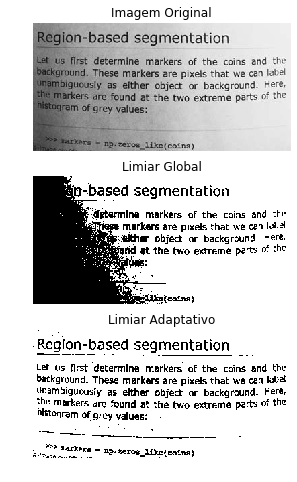

True

In [8]:
image = data.page() #imagem import da base do skimage
#image = data.camera()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 25 #valor deve ser impar
binary_adaptive = threshold_adaptive(image, block_size, offset=10)

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Imagem Original')

ax1.imshow(binary_global)
ax1.set_title('Limiar Global')

ax2.imshow(binary_adaptive)
ax2.set_title('Limiar Adaptativo')

for ax in axes:
    ax.axis('off')

plt.show()
cv2.imwrite('adpThresholding.png',image)
